In [106]:
import torch
import torchvision
import torchvision.transforms as transforms

In [107]:
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split

In [135]:
transform = transforms.Compose(
    [
    transforms.ToTensor(),
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

batch_size = 8


# Create the dataset
dataset = datasets.ImageFolder(root='images', transform=transform)

# Create the DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Define the train-test split ratio
train_ratio = 0.8
test_ratio = 1 - train_ratio

# Calculate the sizes for training and testing datasets
total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = total_size - train_size

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create the DataLoaders
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Print class names and corresponding labels
classes = tuple(dataset.class_to_idx.keys())
dataset.class_to_idx

{'Albrecht_Dürer': 0,
 'Alfred_Sisley': 1,
 'Amedeo_Modigliani': 2,
 'Andrei_Rublev': 3,
 'Andy_Warhol': 4,
 'Camille_Pissarro': 5,
 'Caravaggio': 6,
 'Claude_Monet': 7,
 'Diego_Rivera': 8,
 'Diego_Velazquez': 9,
 'Edgar_Degas': 10,
 'Edouard_Manet': 11,
 'Edvard_Munch': 12,
 'El_Greco': 13,
 'Eugene_Delacroix': 14,
 'Francisco_Goya': 15,
 'Frida_Kahlo': 16,
 'Georges_Seurat': 17,
 'Giotto_di_Bondone': 18,
 'Gustav_Klimt': 19,
 'Gustave_Courbet': 20,
 'Henri_Matisse': 21,
 'Henri_Rousseau': 22,
 'Henri_de_Toulouse-Lautrec': 23,
 'Hieronymus_Bosch': 24,
 'Jackson_Pollock': 25,
 'Jan_van_Eyck': 26,
 'Joan_Miro': 27,
 'Kazimir_Malevich': 28,
 'Leonardo_da_Vinci': 29,
 'Marc_Chagall': 30,
 'Michelangelo': 31,
 'Mikhail_Vrubel': 32,
 'Pablo_Picasso': 33,
 'Paul_Cezanne': 34,
 'Paul_Gauguin': 35,
 'Paul_Klee': 36,
 'Peter_Paul_Rubens': 37,
 'Pierre-Auguste_Renoir': 38,
 'Piet_Mondrian': 39,
 'Pieter_Bruegel': 40,
 'Raphael': 41,
 'Rembrandt': 42,
 'Rene_Magritte': 43,
 'Salvador_Dali': 44,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0335753..2.2916465].


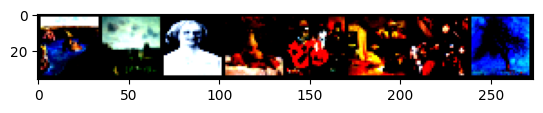

Claude_Monet Camille_Pissarro Albrecht_Dürer Paul_Gauguin Pablo_Picasso Hieronymus_Bosch Hieronymus_Bosch Piet_Mondrian


50

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
len(classes)

In [131]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(24*10*10, len(classes))

    def forward(self, input):
        output = F.relu(self.bn1(self.conv1(input)))      
        output = F.relu(self.bn2(self.conv2(output)))     
        output = self.pool(output)                        
        output = F.relu(self.bn4(self.conv4(output)))     
        output = F.relu(self.bn5(self.conv5(output)))     
        output = output.view(-1, 24*10*10)
        output = self.fc1(output)

        return output
net = Net()

In [111]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

<h1>Train Dataset</h1>

In [112]:
epochs = 20
INCLUDE_TEST = True
for epoch in range(epochs):  # loop over the dataset multiple times
    print("epoch #,", epoch, "/ ", epochs)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0
    if INCLUDE_TEST and (epoch % 10 == 9):
        correct = 0
        total = 0
        # since we're not training, we don't need to calculate the gradients for our outputs
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                # calculate outputs by running images through the network
                outputs = net(images)
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Accuracy of the network on the test images: {100 * correct // total} %')

print('Finished Training')

epoch #, 0 /  25
[1,   200] loss: 3.573
[1,   400] loss: 3.422
[1,   600] loss: 3.224
[1,   800] loss: 3.171
epoch #, 1 /  25
[2,   200] loss: 3.018
[2,   400] loss: 3.001
[2,   600] loss: 2.949
[2,   800] loss: 2.876
epoch #, 2 /  25
[3,   200] loss: 2.681
[3,   400] loss: 2.810
[3,   600] loss: 2.779
[3,   800] loss: 2.752
epoch #, 3 /  25
[4,   200] loss: 2.576
[4,   400] loss: 2.611
[4,   600] loss: 2.573
[4,   800] loss: 2.648
epoch #, 4 /  25
[5,   200] loss: 2.402
[5,   400] loss: 2.407
[5,   600] loss: 2.459
[5,   800] loss: 2.538
epoch #, 5 /  25
[6,   200] loss: 2.249
[6,   400] loss: 2.375
[6,   600] loss: 2.392
[6,   800] loss: 2.342
epoch #, 6 /  25
[7,   200] loss: 2.165
[7,   400] loss: 2.209
[7,   600] loss: 2.229
[7,   800] loss: 2.244
epoch #, 7 /  25
[8,   200] loss: 2.024
[8,   400] loss: 2.098
[8,   600] loss: 2.156
[8,   800] loss: 2.121
epoch #, 8 /  25
[9,   200] loss: 1.950
[9,   400] loss: 1.939
[9,   600] loss: 2.031
[9,   800] loss: 2.043
epoch #, 9 /  25
[1

In [113]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.45576632..1.8199997].


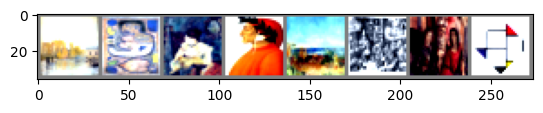

GroundTruth:  Alfred_Sisley Paul_Klee Paul_Gauguin Sandro_Botticelli


In [114]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [115]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [116]:
outputs = net(images)

In [117]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  William_Turner Jan_van_Eyck Peter_Paul_Rubens Paul_Klee


In [118]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 26 %


In [119]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Albrecht_Dürer is 66.2 %
Accuracy for class: Alfred_Sisley is 54.4 %
Accuracy for class: Amedeo_Modigliani is 44.1 %
Accuracy for class: Andrei_Rublev is 25.0 %
Accuracy for class: Andy_Warhol is 12.5 %
Accuracy for class: Camille_Pissarro is 5.9 %
Accuracy for class: Caravaggio is 7.7 %
Accuracy for class: Claude_Monet is 12.5 %
Accuracy for class: Diego_Rivera is 16.7 %
Accuracy for class: Diego_Velazquez is 45.5 %
Accuracy for class: Edgar_Degas is 41.7 %
Accuracy for class: Edouard_Manet is 10.0 %
Accuracy for class: Edvard_Munch is 0.0 %
Accuracy for class: El_Greco is 33.3 %
Accuracy for class: Eugene_Delacroix is 100.0 %
Accuracy for class: Francisco_Goya is 40.6 %
Accuracy for class: Frida_Kahlo is 9.5 %
Accuracy for class: Georges_Seurat is 25.0 %
Accuracy for class: Giotto_di_Bondone is 47.6 %
Accuracy for class: Gustav_Klimt is 41.2 %
Accuracy for class: Gustave_Courbet is 0.0 %
Accuracy for class: Henri_Matisse is 17.9 %
Accuracy for class: Henri_Rousse

In [120]:
len(trainloader)

845